# Closeness centrality

## Langkah 1: Crawl data judul berita dan isi berita dari Kompas.com

In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

# URL yang akan di-crawl
base_url = "https://indeks.kompas.com/terpopuler/?site=all&date="
start_date = "2023-10-01"
end_date = "2023-10-30"

# Membuat list untuk menyimpan data
data = []

# Fungsi untuk mengambil data berita dari halaman web
def crawl_kompas_news(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Cari semua elemen dengan kelas 'article__list__title'
    news_elements = soup.find_all("div", class_="article__list__title")

    for element in news_elements:
        # Dapatkan judul dan tautan berita
        title = element.h3.a.text
        link = element.h3.a["href"]

        # Crawl isi berita dari tautan judul
        article_text = crawl_kompas_article(link)

        # Tambahkan data ke list
        data.append({"Judul": title, "Isi Berita": article_text})

# Fungsi untuk mengambil isi berita dari tautan judul berita
def crawl_kompas_article(article_url):
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Cari elemen dengan kelas 'read__content'
    content_element = soup.find("div", class_="read__content")

    # Dapatkan isi berita
    article_text = content_element.get_text()

    return article_text

# Loop untuk tanggal dari start_date hingga end_date
current_date = datetime.strptime(start_date, "%Y-%m-%d")  # Konversi tanggal awal ke objek datetime
end_date = datetime.strptime(end_date, "%Y-%m-%d")  # Konversi tanggal akhir ke objek datetime

while current_date <= end_date:
    current_url = f"{base_url}{current_date.strftime('%Y-%m-%d')}"  # Menggunakan strftime untuk format tanggal
    print(f"Mengambil berita untuk tanggal {current_date.strftime('%Y-%m-%d')}")
    crawl_kompas_news(current_url)

    # Lanjut ke tanggal berikutnya
    current_date += timedelta(days=1)

# Membuat dataframe pandas dari data
df = pd.DataFrame(data)

# Menyimpan dataframe ke dalam file CSV
df.to_csv("berita_kompas.csv", index=False)


Mengambil berita untuk tanggal 2023-10-01
Mengambil berita untuk tanggal 2023-10-02
Mengambil berita untuk tanggal 2023-10-03
Mengambil berita untuk tanggal 2023-10-04
Mengambil berita untuk tanggal 2023-10-05
Mengambil berita untuk tanggal 2023-10-06
Mengambil berita untuk tanggal 2023-10-07
Mengambil berita untuk tanggal 2023-10-08
Mengambil berita untuk tanggal 2023-10-09
Mengambil berita untuk tanggal 2023-10-10
Mengambil berita untuk tanggal 2023-10-11
Mengambil berita untuk tanggal 2023-10-12
Mengambil berita untuk tanggal 2023-10-13
Mengambil berita untuk tanggal 2023-10-14
Mengambil berita untuk tanggal 2023-10-15
Mengambil berita untuk tanggal 2023-10-16
Mengambil berita untuk tanggal 2023-10-17
Mengambil berita untuk tanggal 2023-10-18
Mengambil berita untuk tanggal 2023-10-19
Mengambil berita untuk tanggal 2023-10-20
Mengambil berita untuk tanggal 2023-10-21
Mengambil berita untuk tanggal 2023-10-22
Mengambil berita untuk tanggal 2023-10-23
Mengambil berita untuk tanggal 202

In [ ]:
df["Isi Berita"] = df["Isi Berita"].str.replace('\n', '')

In [4]:
df

,Judul,Isi Berita
0,Putra Megawati Sopiri Ganjar dan Rombongan Mel...,"JAKARTA, KOMPAS.com - Putra Megawati Soekarnop..."
1,Ada Dokumen Hendak Dimusnahkan Saat KPK Geleda...,"JAKARTA, KOMPAS.com - Komisi Pemberantasan Kor..."
2,"Kecelakaan Beruntun di Tol Semarang, Kendaraan...",KOMPAS.com - Enam kendaraan terlibat kecelakaa...
3,Jessica Wongso Dilarang Wawancara di Film Doku...,KOMPAS.com - Salah satu adegan dalam film doku...
4,"Jika Gibran Dipinang Prabowo, Puan Sebut PDI-P...","JAKARTA, KOMPAS.com - Ketua DPP PDI-P Bidang P..."
...,...,...
700,5 Fakta Turis Asing Ingin Dekati Kawah hingga ...,KOMPAS.com - Seorang wisatawan asing di kawasa...
701,TKN Jokowi-Ma'ruf Sebut Ada Bendera HTI di Kam...,"JAKARTA, KOMPAS.com - Anggota Dewan Pengarah B..."
702,Cemburu Jadi Motif Pelaku Bunuh Pria yang Jena...,"BATAM, KOMPAS.com - Kasus pembunuhan pria yang..."
703,Video: Detik-detik Jatuhnya Meteor 10 Kali Bom...,"KOMPAS.com - 18 Desember tahun lalu, sebuah me..."


In [ ]:
df.to_csv("Data_berita.csv", index=False)

## Langkah 2: Ekstraksi Kalimat (NLTK)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ppw/tugas/data_tugas4/Data_berita.csv")
df

,Judul,Isi Berita
0,Putra Megawati Sopiri Ganjar dan Rombongan Mel...,"JAKARTA, KOMPAS.com - Putra Megawati Soekarnop..."
1,Ada Dokumen Hendak Dimusnahkan Saat KPK Geleda...,"JAKARTA, KOMPAS.com - Komisi Pemberantasan Kor..."
2,"Kecelakaan Beruntun di Tol Semarang, Kendaraan...",KOMPAS.com - Enam kendaraan terlibat kecelakaa...
3,Jessica Wongso Dilarang Wawancara di Film Doku...,KOMPAS.com - Salah satu adegan dalam film doku...
4,"Jika Gibran Dipinang Prabowo, Puan Sebut PDI-P...","JAKARTA, KOMPAS.com - Ketua DPP PDI-P Bidang P..."
...,...,...
700,5 Fakta Turis Asing Ingin Dekati Kawah hingga ...,KOMPAS.com - Seorang wisatawan asing di kawasa...
701,TKN Jokowi-Ma'ruf Sebut Ada Bendera HTI di Kam...,"JAKARTA, KOMPAS.com - Anggota Dewan Pengarah B..."
702,Cemburu Jadi Motif Pelaku Bunuh Pria yang Jena...,"BATAM, KOMPAS.com - Kasus pembunuhan pria yang..."
703,Video: Detik-detik Jatuhnya Meteor 10 Kali Bom...,"KOMPAS.com - 18 Desember tahun lalu, sebuah me..."


In [6]:
berita = df['Isi Berita'].iloc[0]
print(berita)

JAKARTA, KOMPAS.com - Putra Megawati Soekarnoputri, sekaligus Ketua DPP PDI-P M Prananda Prabowo atau akrab disapa Nanan tampak menyopiri bakal calon presiden (bacapres) PDI-P Ganjar Pranowo, di hari kedua Rakernas IV PDI-P, Sabtu (30/9/2023).Saat itu Nanan mengemudikan mobil golf yang ditumpangi Ganjar di atas karpet merah.Selain Ganjar, tampak Ketua Umum PDI-P Megawati Soekarnoputri dan Sekjen Hasto Kristiyanto.Ganjar dan Hasto duduk bersebelahan di kursi tengah. Sementara Megawati menemani Nanan duduk di kursi depan.Baca juga: Hari Kedua Rakernas IV PDI-P: Megawati Beri Arahan Tertutup, Ketua KPU dan Ketua KPK Jadi NarasumberDi kursi belakang Ganjar dan Hasto tampak Mindo Sianipar yang menjabat sebagai Ketua Bidang Koperasi dan UMKM di DPP PDI-P.Mobil golf itu berjalan pelan di atas karpet merah arena Rakernas IV PDI-P di Jiexpo Kemayoran.Megawati, Ganjar dan Hasto sesekali menengok ke arah sekeliling sembari melempar senyum. Sedangkan Nanan, terlihat fokus pada jalur yang dilalui m

In [8]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=9a1862fe1253f715fe05ba87837a8d7168e8d798641ef6b8d9adbfa358f616a5
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [9]:
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Langkah 3: TF IDF

In [10]:
kalimat = nltk.sent_tokenize(berita)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"\nKalimat {i+1}: {sentence}")
    for j, term in enumerate(terms):
        tfidf_value = tfidf_matrix[i, j]
        if tfidf_value > 0:
            print(f"{term}: {tfidf_value:.4f}")


Kalimat 1: JAKARTA, KOMPAS.com - Putra Megawati Soekarnoputri, sekaligus Ketua DPP PDI-P M Prananda Prabowo atau akrab disapa Nanan tampak menyopiri bakal calon presiden (bacapres) PDI-P Ganjar Pranowo, di hari kedua Rakernas IV PDI-P, Sabtu (30/9/2023).Saat itu Nanan mengemudikan mobil golf yang ditumpangi Ganjar di atas karpet merah.Selain Ganjar, tampak Ketua Umum PDI-P Megawati Soekarnoputri dan Sekjen Hasto Kristiyanto.Ganjar dan Hasto duduk bersebelahan di kursi tengah.
2023: 0.1251
30: 0.1251
akrab: 0.1251
atas: 0.1039
atau: 0.1251
bacapres: 0.1251
bakal: 0.1251
bersebelahan: 0.1251
calon: 0.1251
com: 0.0888
dan: 0.1351
di: 0.1783
disapa: 0.1251
ditumpangi: 0.1251
dpp: 0.1039
duduk: 0.1039
ganjar: 0.3083
golf: 0.0888
hari: 0.0771
hasto: 0.1542
itu: 0.0888
iv: 0.0888
jakarta: 0.1251
karpet: 0.1039
kedua: 0.1039
ketua: 0.2077
kompas: 0.0888
kristiyanto: 0.1039
kursi: 0.1039
megawati: 0.1776
mengemudikan: 0.1251
menyopiri: 0.1251
merah: 0.1039
mobil: 0.0888
nanan: 0.1776
pdi: 0.30

## Langkah 4: Cosine Similarity

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.4935
Similarity Kalimat 1 dan Kalimat 3: 0.2856
Similarity Kalimat 1 dan Kalimat 4: 0.2515
Similarity Kalimat 1 dan Kalimat 5: 0.0913
Similarity Kalimat 1 dan Kalimat 6: 0.0563
Similarity Kalimat 1 dan Kalimat 7: 0.0314
Similarity Kalimat 2 dan Kalimat 3: 0.2967
Similarity Kalimat 2 dan Kalimat 4: 0.2485
Similarity Kalimat 2 dan Kalimat 5: 0.0746
Similarity Kalimat 2 dan Kalimat 6: 0.0287
Similarity Kalimat 2 dan Kalimat 7: 0.0398
Similarity Kalimat 3 dan Kalimat 4: 0.3780
Similarity Kalimat 3 dan Kalimat 5: 0.0411
Similarity Kalimat 3 dan Kalimat 6: 0.0133
Similarity Kalimat 3 dan Kalimat 7: 0.0746
Similarity Kalimat 4 dan Kalimat 5: 0.0792
Similarity Kalimat 4 dan Kalimat 6: 0.0534
Similarity Kalimat 4 dan Kalimat 7: 0.0104
Similarity Kalimat 5 dan Kalimat 6: 0.1542
Similarity Kalimat 5 dan Kalimat 7: 0.0000
Similarity Kalimat 6 dan Kalimat 7: 0.0906


In [14]:
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3,4,5,6
0,1.000000,0.493489,0.285604,0.251537,0.091342,0.056335,0.031367
1,0.493489,1.000000,0.296707,0.248540,0.074640,0.028714,0.039768
2,0.285604,0.296707,1.000000,0.378006,0.041130,0.013291,0.074620
3,0.251537,0.248540,0.378006,1.000000,0.079220,0.053394,0.010405
4,0.091342,0.074640,0.041130,0.079220,1.000000,0.154183,0.000000
5,0.056335,0.028714,0.013291,0.053394,0.154183,1.000000,0.090560
6,0.031367,0.039768,0.074620,0.010405,0.000000,0.090560,1.000000


## Langkah 5: Graph

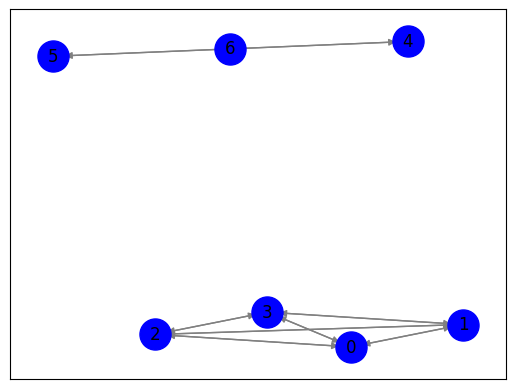

In [15]:
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.150 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Langkah 6: Closeness Centrality

In [16]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 0: 0.5000
Node 1: 0.5000
Node 2: 0.5000
Node 3: 0.5000
Node 4: 0.1667
Node 5: 0.1667
Node 6: 0.0000


In [17]:
print("\nTiga Node Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Tiga Node Tertinggi dengan Kalimat:
Node 0: Closeness Centrality = 0.5000
Kalimat: JAKARTA, KOMPAS.com - Putra Megawati Soekarnoputri, sekaligus Ketua DPP PDI-P M Prananda Prabowo atau akrab disapa Nanan tampak menyopiri bakal calon presiden (bacapres) PDI-P Ganjar Pranowo, di hari kedua Rakernas IV PDI-P, Sabtu (30/9/2023).Saat itu Nanan mengemudikan mobil golf yang ditumpangi Ganjar di atas karpet merah.Selain Ganjar, tampak Ketua Umum PDI-P Megawati Soekarnoputri dan Sekjen Hasto Kristiyanto.Ganjar dan Hasto duduk bersebelahan di kursi tengah.

Node 1: Closeness Centrality = 0.5000
Kalimat: Sementara Megawati menemani Nanan duduk di kursi depan.Baca juga: Hari Kedua Rakernas IV PDI-P: Megawati Beri Arahan Tertutup, Ketua KPU dan Ketua KPK Jadi NarasumberDi kursi belakang Ganjar dan Hasto tampak Mindo Sianipar yang menjabat sebagai Ketua Bidang Koperasi dan UMKM di DPP PDI-P.Mobil golf itu berjalan pelan di atas karpet merah arena Rakernas IV PDI-P di Jiexpo Kemayoran.Megawati, Ganj